In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [4]:
import pandas as pd
df= pd.read_csv(r'C:\Users\shreya.ramesh\Downloads\Superstore_dataset.csv', encoding = 'utf-8', encoding_errors= 'replace')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium


In [5]:
column_names=df.columns.values

In [6]:
#Since all columns are not needed for sales forecasting the following can be deleted
df=df[column_names]

In [7]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [9]:
df.drop(['Row ID', 'Order ID', 'Customer ID', 'Product ID', 'Postal Code', 'Ship Mode' ], axis=1, inplace=True)

In [10]:
df

,Order Date,Ship Date,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,01-01-2011,06-01-2011,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,01-01-2011,08-01-2011,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,01-01-2011,05-01-2011,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,01-01-2011,05-01-2011,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,01-01-2011,08-01-2011,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,31-12-2014,04-01-2015,Erica Bern,Corporate,Fairfield,California,United States,US,West,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,31-12-2014,05-01-2015,Liz Preis,Consumer,Agadir,Souss-Massa-Dra�,Morocco,Africa,Africa,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,31-12-2014,02-01-2015,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,LATAM,Central,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,31-12-2014,06-01-2015,Tamara Dahlen,Consumer,Ju�rez,Chihuahua,Mexico,LATAM,North,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [11]:
#Data has 52000 rows, too big a data so for the purpose of smooth running of the model decide to continue with the first 10000 drop the rest
df=df.iloc[0:10000,:]
print(df['Segment'].unique())

['Consumer' 'Home Office' 'Corporate']


Text(0.5, 1.0, 'State wise Sales')

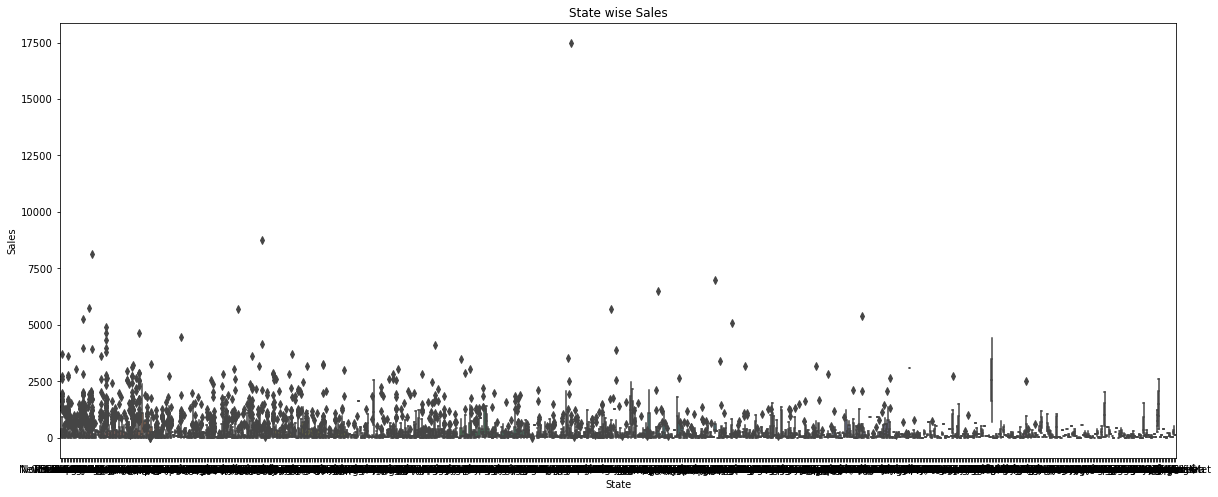

In [12]:
#Basic Exploratory Data Analysis
plt.figure(figsize=(20,8))
sns.boxplot("State", "Sales", data=df)
plt.title("State wise Sales")

(0.0, 500.0)

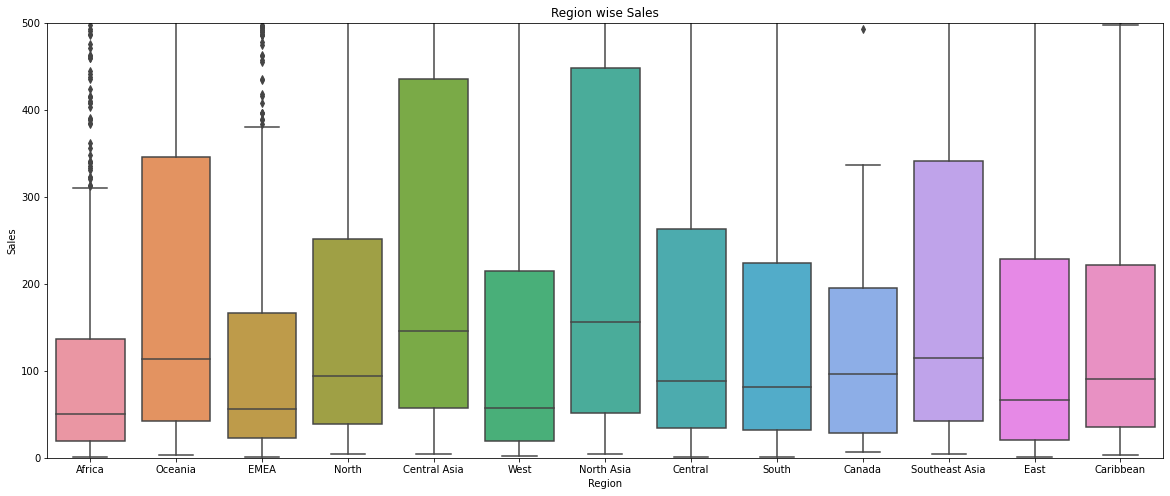

In [13]:
plt.figure(figsize=(20,8))
sns.boxplot("Region", "Sales", data=df)
plt.title("Region wise Sales")
plt.ylim(0,500)

In [14]:
df[df['Region']== "Africa"].describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,862.000000,862.000000,862.000000,862.000000,862.000000
mean,160.692595,2.281903,0.195128,15.425252,18.276090
std,375.116838,2.068653,0.313052,142.007082,48.648414
min,1.323000,1.000000,0.000000,-1020.108000,0.020000
25%,19.155000,1.000000,0.000000,-6.018000,1.725000
50%,50.730000,1.000000,0.000000,6.060000,4.830000
75%,136.380000,2.000000,0.700000,25.920000,15.197500
max,5100.000000,14.000000,0.700000,1563.480000,903.040000


(0.0, 18000.0)

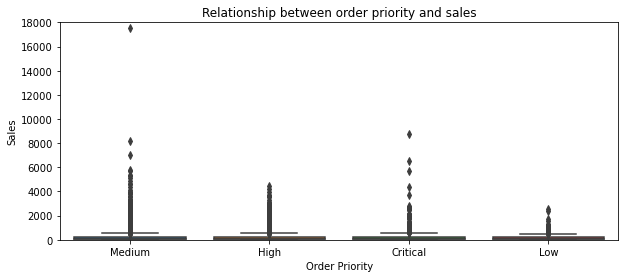

In [15]:
plt.figure(figsize=(10,4))
sns.boxplot("Order Priority", "Sales", data=df)
plt.title("Relationship between order priority and sales")
plt.ylim(0,18000)

In [16]:
df[df["Order Priority"]=="Medium"].describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,5783.000000,5783.000000,5783.000000,5783.000000,5783.000000
mean,255.654583,3.524987,0.141958,32.845778,18.963880
std,529.745902,2.256860,0.210230,199.538985,40.101976
min,0.898000,1.000000,0.000000,-1869.876000,0.020000
25%,32.649300,2.000000,0.000000,0.000000,2.110000
50%,87.300000,3.000000,0.000000,9.960000,6.060000
75%,256.947000,5.000000,0.200000,36.863000,18.520000
max,17499.950000,14.000000,0.800000,8399.976000,665.270000


Text(0.5, 1.0, 'Relationship between order priority and profit')

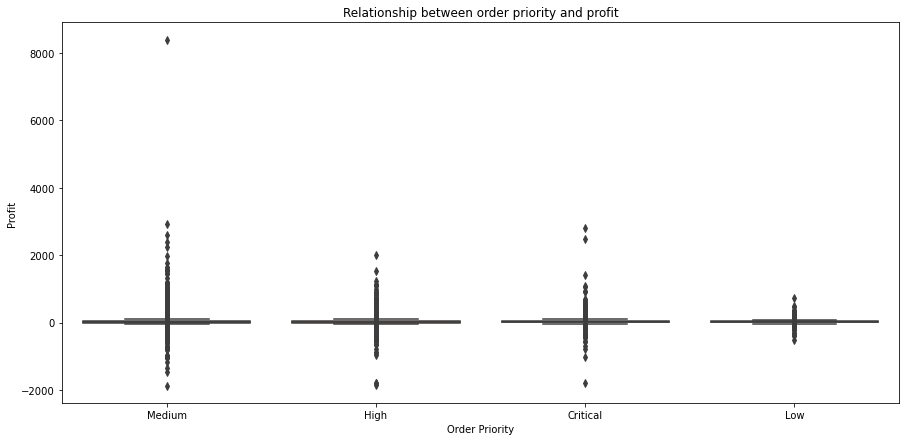

In [17]:
plt.figure(figsize=(15,7))
sns.boxplot("Order Priority", "Profit", data=df)
plt.title("Relationship between order priority and profit")

(0.0, 200.0)

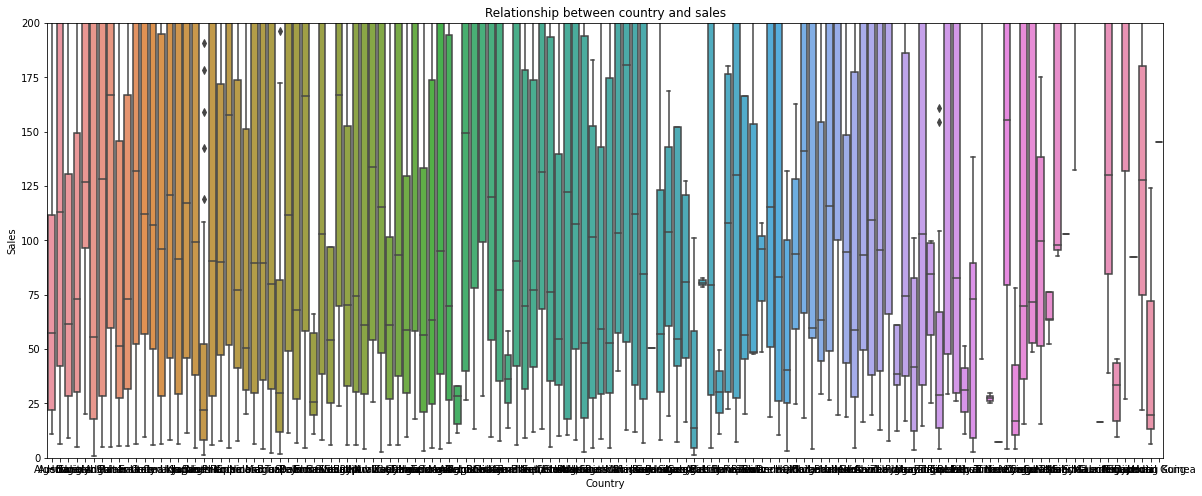

In [18]:
plt.figure(figsize=(20,8))
sns.boxplot("Country", "Sales", data=df)
plt.title("Relationship between country and sales")
plt.ylim(0,200)

(0.0, 7500.0)

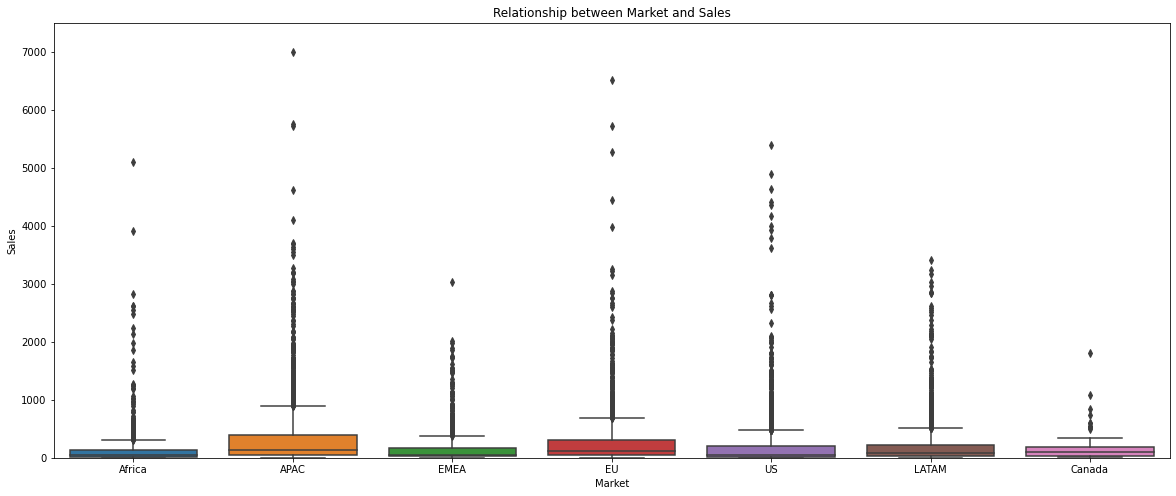

In [19]:
plt.figure(figsize=(20,8))
sns.boxplot("Market", "Sales", data=df)
plt.title("Relationship between Market and Sales")
plt.ylim(0,7500)

In [20]:
df

,Order Date,Ship Date,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,01-01-2011,06-01-2011,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,01-01-2011,08-01-2011,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,01-01-2011,05-01-2011,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,01-01-2011,05-01-2011,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,01-01-2011,08-01-2011,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,06-02-2013,10-02-2013,Dan Lawera,Consumer,M�rida,Yucat�n,Mexico,LATAM,North,Office Supplies,Binders,"Acco Binder Covers, Recycled",18.240,2,0.0,1.640,1.30,Medium
9996,06-02-2013,12-02-2013,Sheri Gordon,Consumer,Managua,Managua,Nicaragua,LATAM,Central,Office Supplies,Paper,"Green Bar Note Cards, Premium",19.860,1,0.0,2.580,1.03,Medium
9997,06-02-2013,10-02-2013,Jill Fjeld,Consumer,Kinshasa,Kinshasa,Democratic Republic of the Congo,Africa,Africa,Office Supplies,Storage,"Smead Box, Single Width",10.800,1,0.0,2.790,0.74,Medium
9998,06-02-2013,11-02-2013,Toby Carlisle,Consumer,Hubli,Karnataka,India,APAC,Central Asia,Office Supplies,Envelopes,"Kraft Clasp Envelope, Security-Tint",11.400,1,0.0,0.210,0.28,Medium


(0.0, 7500.0)

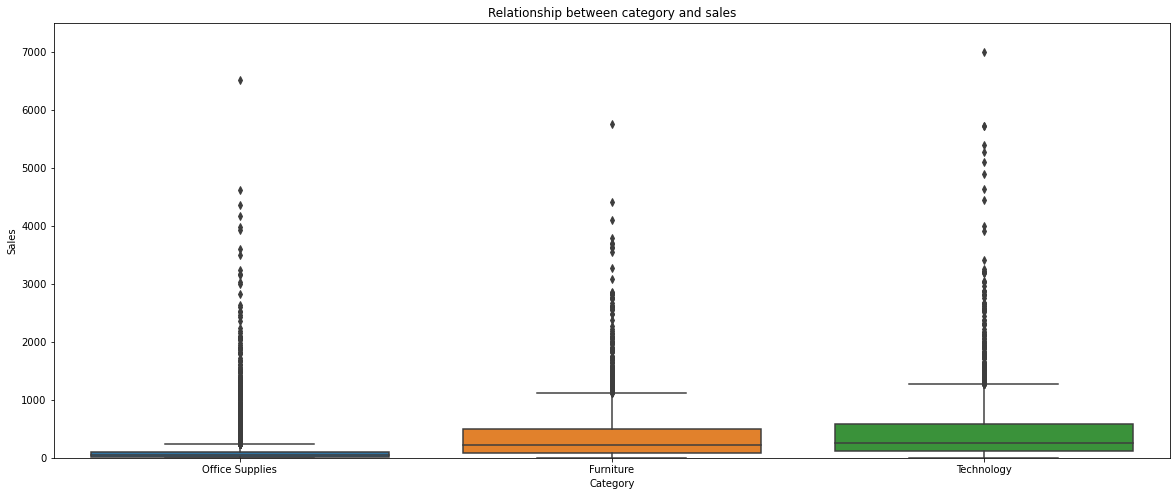

In [21]:
plt.figure(figsize=(20,8))
sns.boxplot("Category", "Sales", data=df)
plt.title("Relationship between category and sales")
plt.ylim(0,7500)

(0.0, 5000.0)

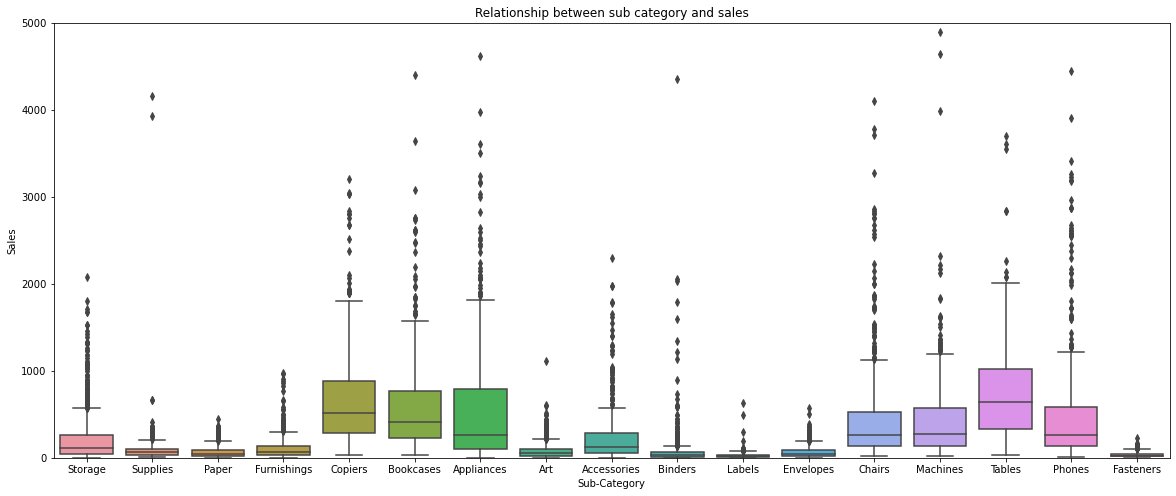

In [22]:
plt.figure(figsize=(20,8))
sns.boxplot("Sub-Category", "Sales", data=df)
plt.title("Relationship between sub category and sales")
plt.ylim(0,5000)

In [23]:
df["Country"].unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Bangladesh',
       'United States', 'Angola', 'China', 'Panama', 'Iran', 'France',
       'Italy', 'Germany', 'Canada', 'United Kingdom', 'Ukraine', 'Japan',
       'Indonesia', 'Nigeria', 'South Korea', 'Peru', 'Philippines',
       'Colombia', 'Ireland', 'Nicaragua', 'Mexico', 'Brazil', 'Turkey',
       'Spain', 'Poland', 'India', 'Somalia', 'El Salvador', 'Sudan',
       'Slovakia', 'Egypt', 'Saudi Arabia',
       'Democratic Republic of the Congo', 'Norway', 'New Zealand',
       'Kenya', 'Cuba', 'Venezuela', 'Singapore', 'Honduras', 'Tanzania',
       'Dominican Republic', 'Morocco', 'Albania', 'Belgium',
       'Afghanistan', 'Bolivia', 'Vietnam', 'Guatemala', 'Guinea-Bissau',
       'Thailand', 'Iraq', 'Myanmar (Burma)', 'Ecuador', 'Netherlands',
       'Ghana', "Cote d'Ivoire", 'Austria', 'Argentina', 'Madagascar',
       'Russia', 'South Africa', 'Bosnia and Herzegovina', 'Malaysia',
       'Romania', 'Israel', 'Burundi', '

In [24]:
print(df["Sales"].max())
print(df["Sales"].min())

17499.95
0.898


(0.0, 20000.0)

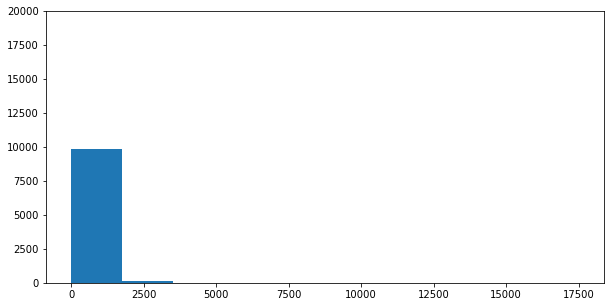

In [25]:
plt.figure(figsize=(10,5))
plt.hist(x="Sales", data=df, bins=10)
plt.ylim(0,20000)

In [26]:
df["Sales"].describe()

count    10000.000000
mean       249.489614
std        502.207609
min          0.898000
25%         31.123750
50%         84.480000
75%        252.000000
max      17499.950000
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Sales', ylabel='Density'>

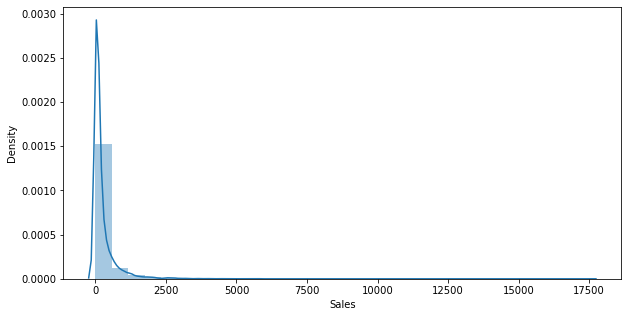

In [27]:
plt.figure(figsize=(10,5))
sns.distplot(df["Sales"], bins = 30)
#sns.distplot(df["Profit"])

In [28]:
#column_names=df[df.columns.unique()]
column_names=["No. of unique columns in the table"]
pd.DataFrame(df.nunique(axis=0), columns=column_names)

,No. of unique columns in the table
Order Date,342
Ship Date,539
Customer Name,795
Segment,3
City,1831
State,742
Country,132
Market,7
Region,13
Category,3


In [29]:
#Checking and removing duplicates
df.duplicated().sum()
#no duplicates found

0

In [30]:
df.columns.values

array(['Order Date', 'Ship Date', 'Customer Name', 'Segment', 'City',
       'State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'], dtype=object)

In [31]:
#Correlation heatmap graph
Categorical=['Region', 'Country', 'Market', 'City', 'State', 'Segment', 'Category', 'Sub-Category', 'Order Priority', 'Product Name']

In [32]:
numerical=[item for item in df.columns.to_list() if item not in Categorical]

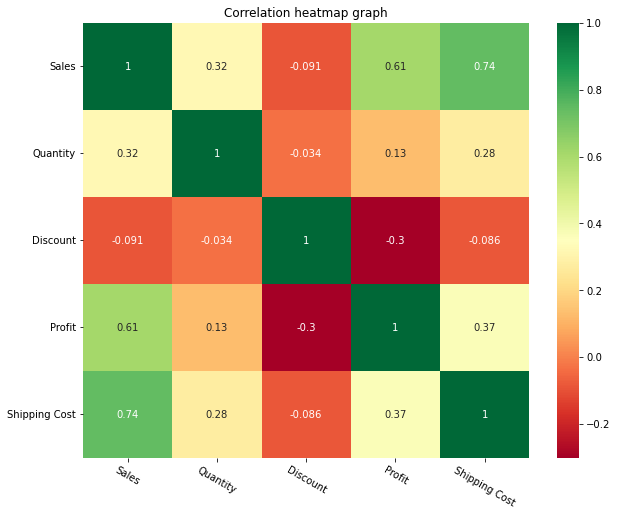

In [33]:
corr_data=df[numerical]
corr=corr_data.corr(method='pearson')
plt.close()
corr_plot=sns.heatmap(corr, annot=True, cmap="RdYlGn")
fig=plt.gcf()
#plt.gcf() is used to get the figure, so it gets saved in the variable fig
fig.set_size_inches(10,8)
#set_size_inches is used to set the size of the figure 
plt.xticks(fontsize=10, rotation=-30)
plt.yticks(fontsize=10)
plt.title("Correlation heatmap graph")
plt.show()

(0.0, 5000.0)

<Figure size 720x576 with 0 Axes>

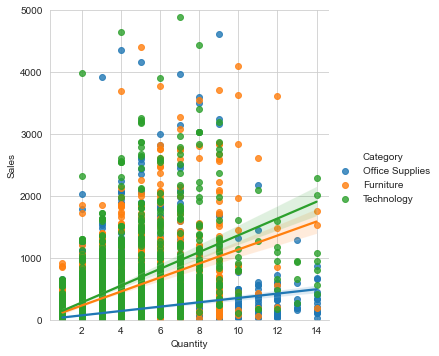

In [34]:
#Regression Plot
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lmplot("Quantity", "Sales", data=df, hue="Category")
plt.ylim(0,5000)
#df

<Figure size 720x576 with 0 Axes>

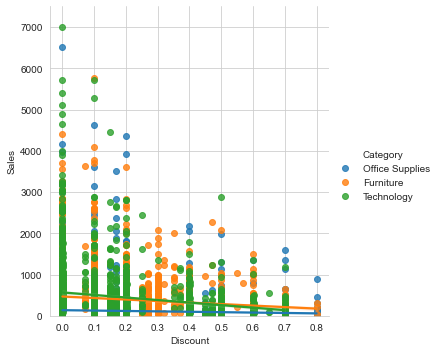

In [35]:
plt.figure(figsize=(10,8))
sns.lmplot("Discount", "Sales", data=df, hue="Category")
plt.ylim(0,7500)
sns.set_style("whitegrid")

(0.0, 7500.0)

<Figure size 720x576 with 0 Axes>

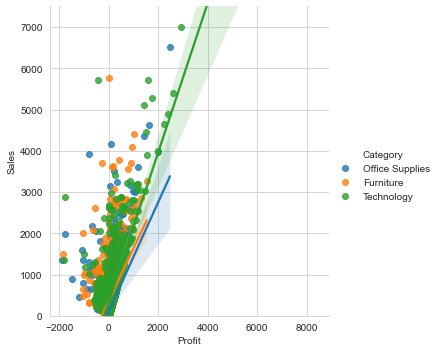

In [37]:
plt.figure(figsize=(10,8))
sns.lmplot("Profit", "Sales", data=df, hue="Category")
plt.ylim(0,7500)
#sns.set_style("whitegrid")

<Figure size 720x576 with 0 Axes>

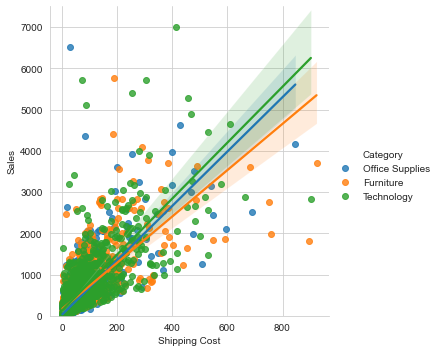

In [38]:
plt.figure(figsize=(10,8))
sns.lmplot("Shipping Cost", "Sales", data=df, hue="Category")
plt.ylim(0,7500)
sns.set_style("whitegrid")

(0.0, 500.0)

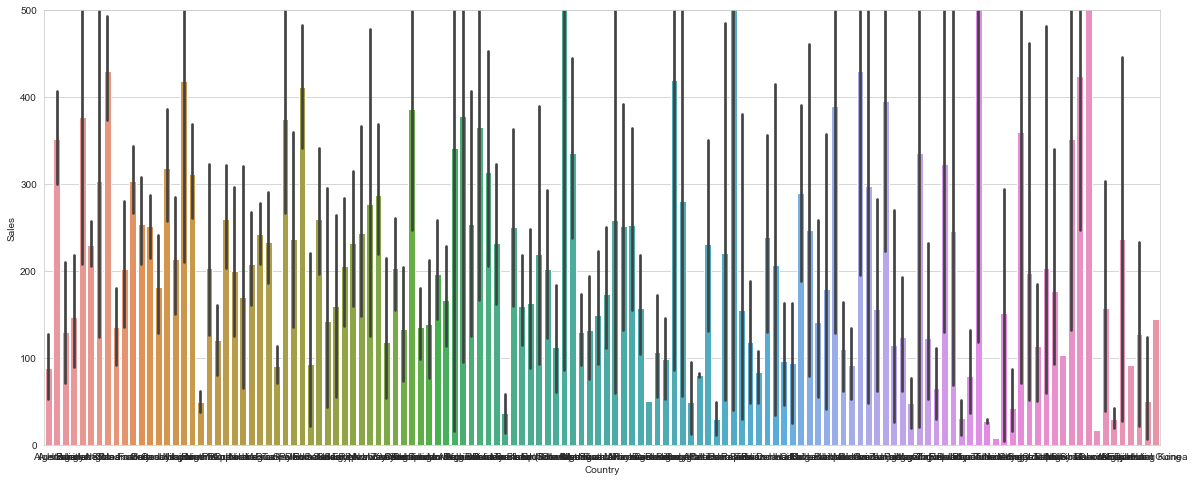

In [39]:
#Bar plot
plt.figure(figsize=(20,8))
sns.barplot("Country", "Sales", data=df)
plt.ylim(0,500)

<AxesSubplot:xlabel='City', ylabel='Sales'>

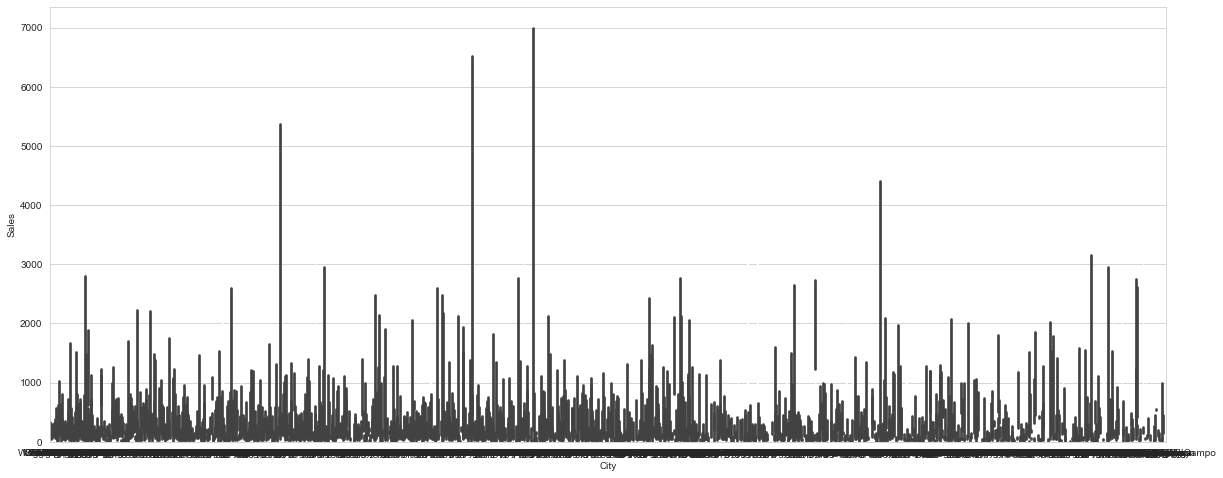

In [40]:
#df
plt.figure(figsize=(20,8))
sns.barplot("City", "Sales", data=df)

<AxesSubplot:xlabel='Market', ylabel='Sales'>

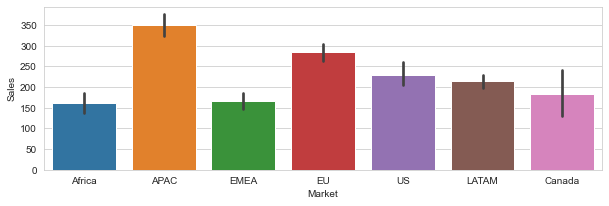

In [41]:
plt.figure(figsize=(10,3))
sns.barplot("Market", "Sales", data=df)

<AxesSubplot:xlabel='State', ylabel='Sales'>

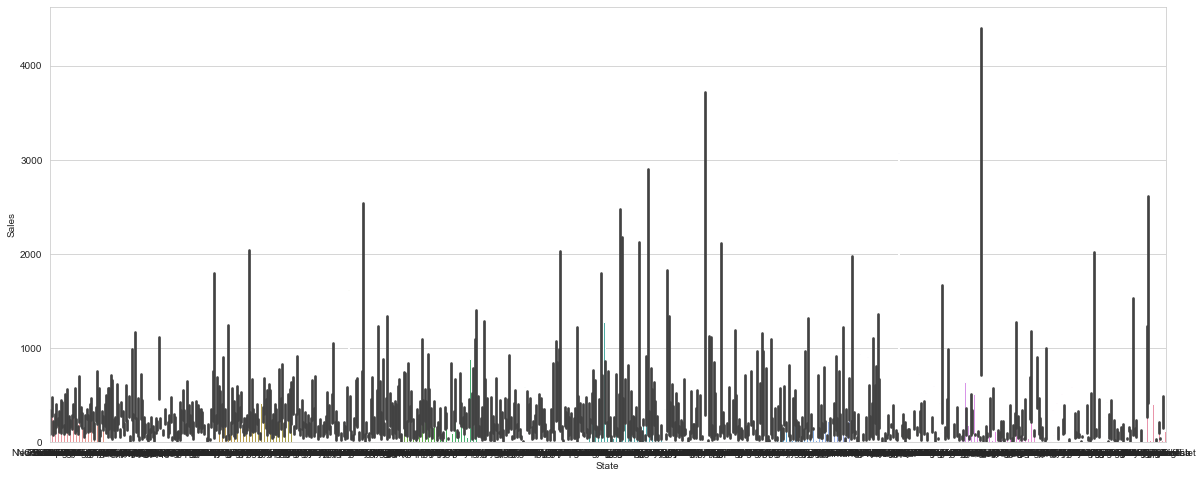

In [42]:
plt.figure(figsize=(20,8))
sns.barplot("State", "Sales", data=df)

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

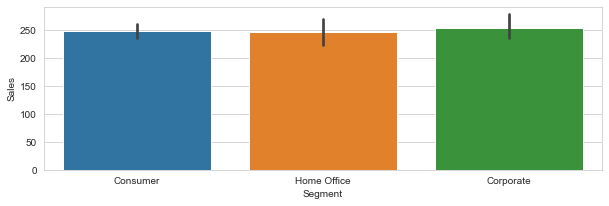

In [43]:
#Categorical=['Region', 'Country', 'Market', 'City', 'State', 'Segment', 'Category', 'Sub-Category', 'Order Priority', 'Product Name']
plt.figure(figsize=(10,3))
sns.barplot("Segment", "Sales", data=df)

<AxesSubplot:xlabel='Category', ylabel='Sales'>

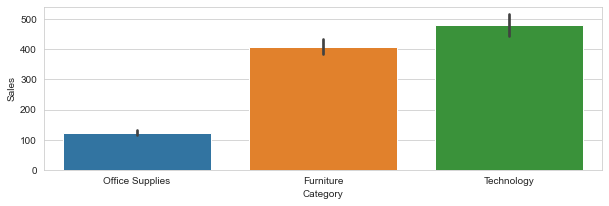

In [44]:
plt.figure(figsize=(10,3))
sns.barplot("Category", "Sales", data=df)

<AxesSubplot:xlabel='Sub-Category', ylabel='Sales'>

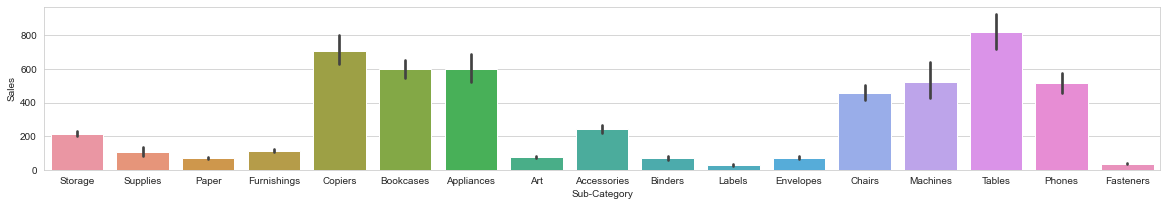

In [45]:
plt.figure(figsize=(20,3))
sns.barplot("Sub-Category", "Sales", data=df)

<AxesSubplot:xlabel='Order Priority', ylabel='Sales'>

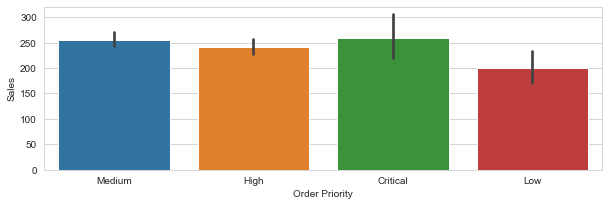

In [46]:
plt.figure(figsize=(10,3))
sns.barplot("Order Priority", "Sales", data=df)

<Figure size 1440x576 with 0 Axes>

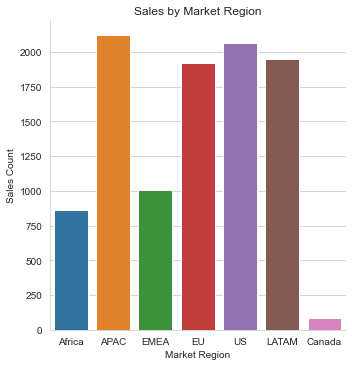

In [49]:
plt.figure(figsize=(20,8))
sns.catplot("Market", kind="count", data=df)
plt.xlabel("Market Region")
plt.ylabel("Sales Count")
plt.title("Sales by Market Region")
plt.show()

In [50]:
f1=pd.read_csv(r'C:\Users\shreya.ramesh\Downloads\Superstore_dataset.csv', encoding='utf-8', encoding_errors= 'replace')
f1=f1[0:10000]
#f1

plt.figure(figsize=(10,8))
top10countries=f1.groupby('Country')['Sales'].count().sort_values(ascending=False)
top10countries=top10countries[:10]
top10countries.plot(kind='bar')

<AxesSubplot:xlabel='State'>

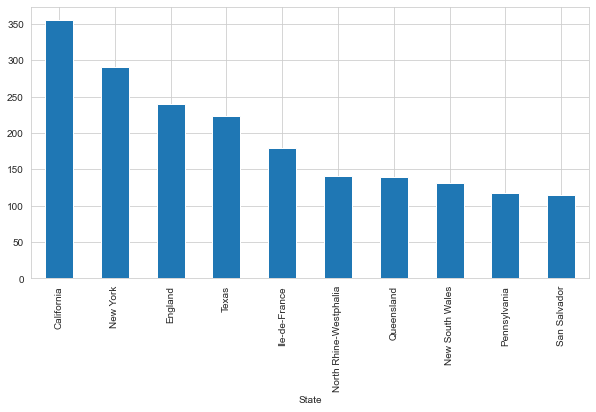

In [51]:
#Top 10 States 
plt.figure(figsize=(10,5))
top10states=f1.groupby('State')['Sales'].count().sort_values(ascending=False)
#it by default takes ascending so you convert to false to take the descending value 
top10states=top10states[:10]
top10states.plot(kind='bar')
#Calfornia is the state with the most sales

<AxesSubplot:xlabel='Country'>

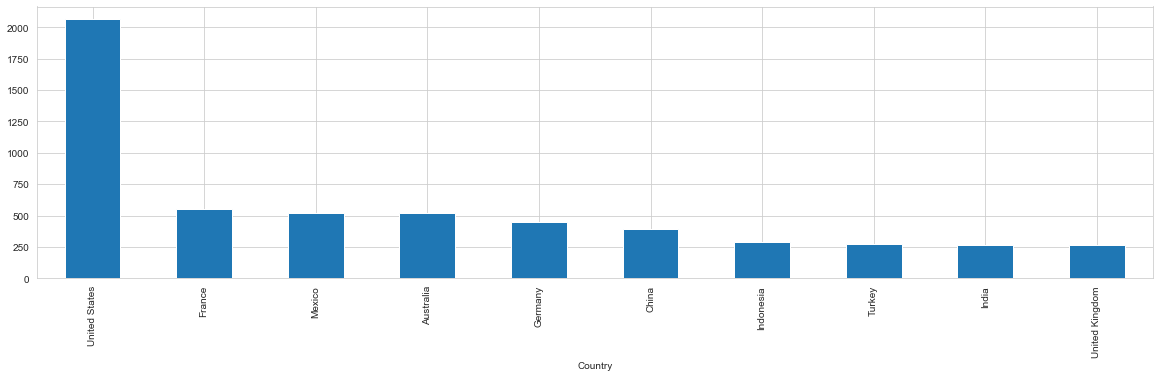

In [52]:
plt.figure(figsize=(20,5))
top10countries=f1.groupby('Country')['Sales'].count().sort_values(ascending=False)
top10countries=top10countries[:10]
top10countries.plot(kind='bar')
#United States is the country with the most sales

<AxesSubplot:xlabel='City'>

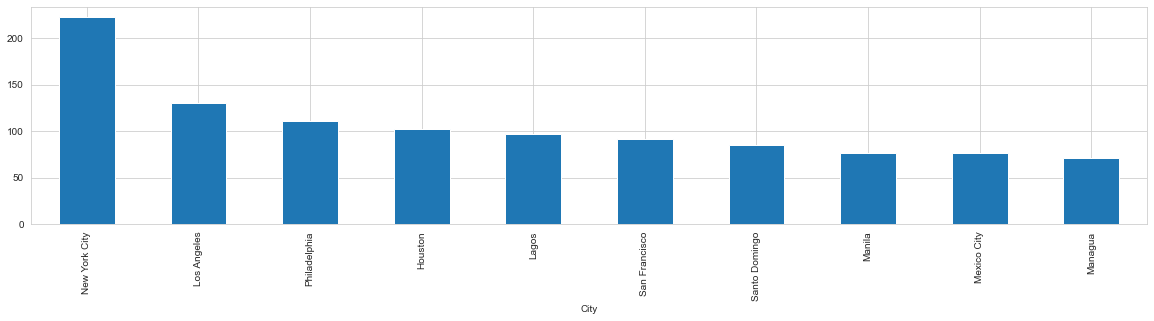

In [53]:
plt.figure(figsize=(20,4))
top10cities=f1.groupby('City')['Sales'].count().sort_values(ascending=False)
top10cities=top10cities[:10]
top10cities.plot(kind='bar')
#New York is the city with the most sales

Text(0.5, 1.0, 'Segment wise Sales analysis')

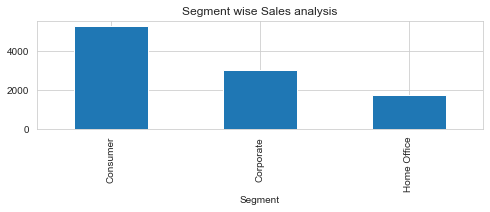

In [54]:
#Top 10 Segments
plt.figure(figsize=(8,2))
segment_wise_analysis=f1.groupby('Segment')['Sales'].count().sort_values(ascending=False)
segment_wise_analysis.plot(kind='bar')
plt.title('Segment wise Sales analysis')

Text(0.5, 1.0, 'Region wise sales analysis')

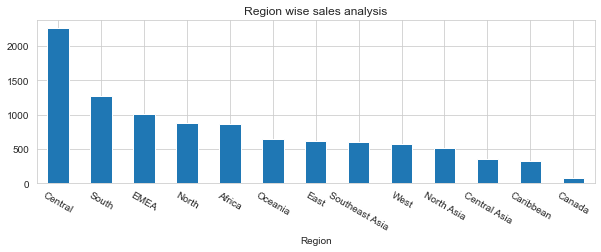

In [55]:
#Region wise total sales
plt.figure(figsize=(10,3))
Region_wise_sales=f1.groupby('Region')['Sales'].count().sort_values(ascending=False)
Region_wise_sales.plot(kind='bar')
plt.xticks(rotation=-30)
plt.title('Region wise sales analysis')
#Central Region has maximum sales

<Figure size 720x432 with 0 Axes>

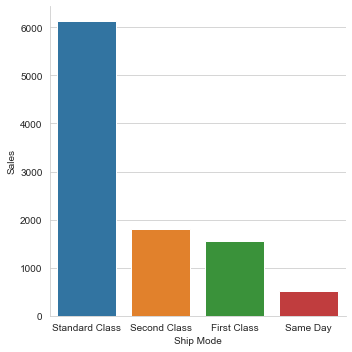

In [56]:
#Ship mode wise number of sales
plt.figure(figsize=(10,6))
sns.catplot(x='Ship Mode', kind='count', data=f1, )
# sns.catplot(x='Ship')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.show()

In [57]:
f1[f1['Ship Mode']=='Standard Class'].describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,6127.000000,1260.000000,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000
mean,25831.365432,53236.836508,245.042654,3.491105,0.140650,31.443749,19.321851
std,14788.009296,31980.008766,503.823570,2.236406,0.210749,187.215252,37.188922
min,12.000000,1040.000000,0.898000,1.000000,0.000000,-1869.876000,0.030000
25%,13031.500000,20735.000000,31.710300,2.000000,0.000000,0.000000,2.255000
50%,26130.000000,53142.000000,84.900000,3.000000,0.000000,9.604800,6.340000
75%,38405.000000,85023.000000,249.862500,5.000000,0.200000,36.285000,19.320000
max,51266.000000,99301.000000,17499.950000,14.000000,0.800000,8399.976000,487.860000


<Figure size 1440x576 with 0 Axes>

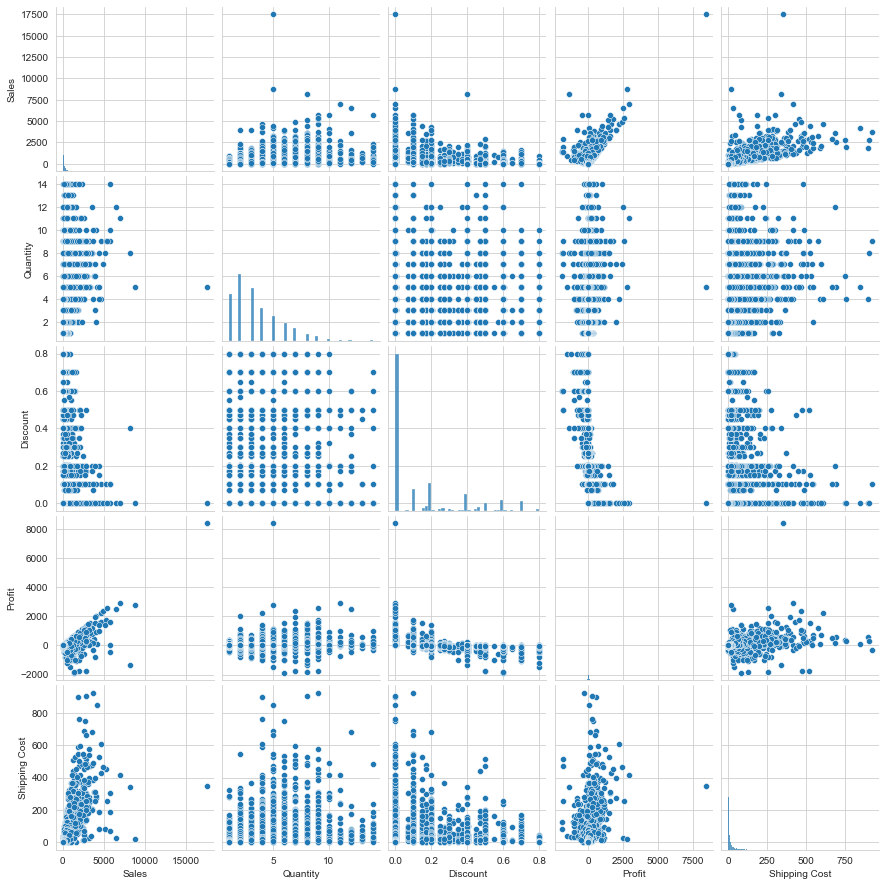

In [58]:
#Pair Plot 
plt.figure(figsize=(20,8))
sns.pairplot(df)


In [59]:
#Changing the datatype of Order Date
f1['Order Date']=pd.to_datetime(f1['Order Date'])
f1['Ship Date']=pd.to_datetime(f1['Ship Date'])

In [60]:
f1['Order Date'].describe()

count                   10000
unique                    342
top       2012-08-11 00:00:00
freq                       88
first     2011-01-01 00:00:00
last      2013-06-03 00:00:00
Name: Order Date, dtype: object

<AxesSubplot:xlabel='year', ylabel='Sales'>

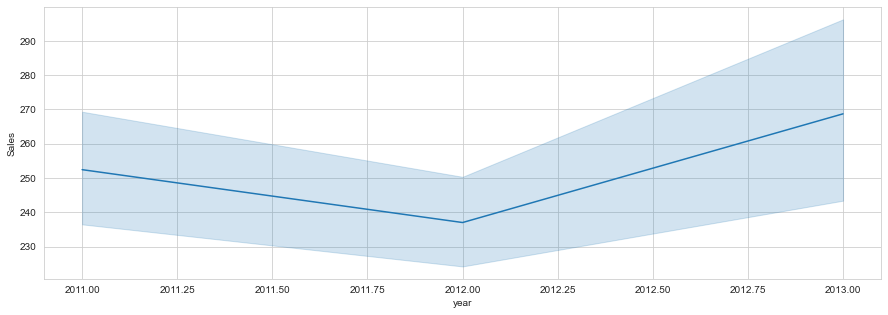

In [61]:
f1['year']=pd.DatetimeIndex(f1['Order Date']).year
#adding a column to f1
plt.figure(figsize=(15,5))
sns.lineplot(x='year', y='Sales', data=f1)

In [62]:
#Checking for duplicates and dropping if any found
f1.duplicated().sum()
#no duplicates found 

0

In [63]:
#Removing all non-essential features from the dataframe
df.Region.unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Central Asia', 'West',
       'North Asia', 'Central', 'South', 'Canada', 'Southeast Asia',
       'East', 'Caribbean'], dtype=object)

In [64]:
df2=pd.get_dummies(df[['Region', 'Sales']], drop_first=True)

In [65]:
df2.head()

,Sales,Region_Canada,Region_Caribbean,Region_Central,Region_Central Asia,Region_EMEA,Region_East,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West
0,408.300,0,0,0,0,0,0,0,0,0,0,0,0
1,120.366,0,0,0,0,0,0,0,0,1,0,0,0
2,66.120,0,0,0,0,1,0,0,0,0,0,0,0
3,44.865,0,0,0,0,0,0,1,0,0,0,0,0
4,113.670,0,0,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

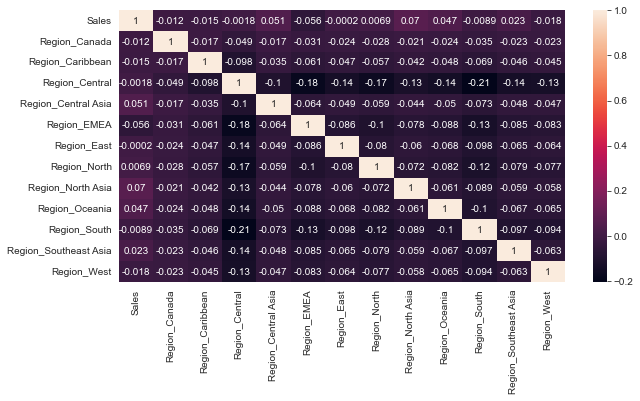

In [66]:
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr() ,annot=True)

In [67]:
df3=pd.get_dummies(df[['Market', 'Sales']], drop_first=True)
df3.head()

,Sales,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US
0,408.300,1,0,0,0,0,0
1,120.366,0,0,0,0,0,0
2,66.120,0,0,1,0,0,0
3,44.865,0,0,0,1,0,0
4,113.670,0,0,0,0,0,0


<AxesSubplot:>

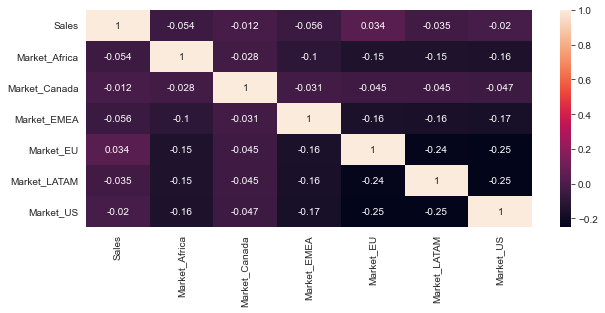

In [68]:
plt.figure(figsize=(10,4))
sns.heatmap(df3.corr(), annot=True)

In [69]:
df4=pd.get_dummies(df[['Category', 'Sales']])
df4.head()

,Sales,Category_Furniture,Category_Office Supplies,Category_Technology
0,408.300,0,1,0
1,120.366,0,1,0
2,66.120,0,1,0
3,44.865,0,1,0
4,113.670,1,0,0


<AxesSubplot:>

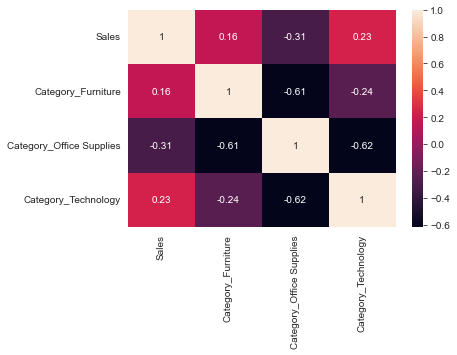

In [70]:
sns.heatmap(df4.corr(), annot=True)

<AxesSubplot:>

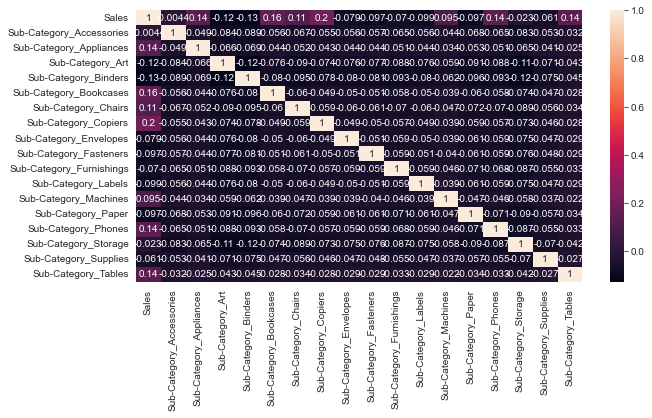

In [71]:
df5=pd.get_dummies(df[['Sub-Category', 'Sales']])
plt.figure(figsize=(10,5))
sns.heatmap(df5.corr(), annot=True)

<AxesSubplot:>

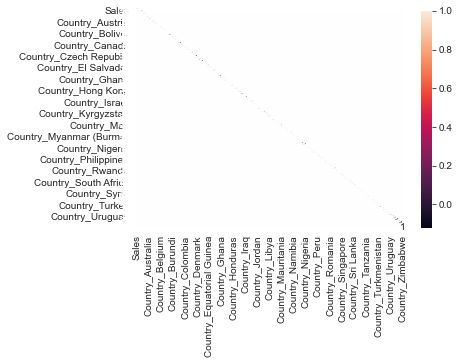

In [72]:
df6=pd.get_dummies(df[['Country', 'Sales']])
sns.heatmap(df6.corr(), annot=True)

In [73]:
#An analysis of sales by market and region shows a negative correlation, therefore a seperate analysis for country, city and state is not needed.
#An analysis of sales by category and sub-category again shows the correlation, which can be extrapolated to product name
#Hence dropping all the columns not needed
df.drop(['City', 'State', 'Country', 'Product Name', 'Market', 'Region'], axis=1, inplace=True)
#the inplace parameter will make the changes to the original dataframe. If not true, it will assume the default value of false which will then drop the columns only in the copy of the dataframe not in the original dataframe

In [74]:
#we can also drop Order Date, Ship Date, Customer Name as they have no impact on sales 
df.drop(['Customer Name', 'Order Date', 'Ship Date'], axis=1, inplace=True)

(0.0, 500.0)

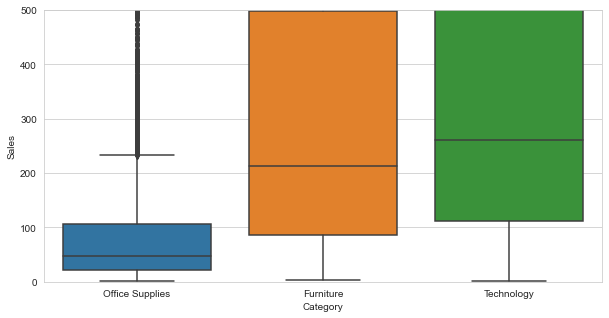

In [75]:
#Removing outliers by replacing the outlier values using the Flooring and Capping method
plt.figure(figsize=(10,5))
sns.boxplot('Category','Sales', data=df)
plt.ylim(0,500)

In [76]:
df.isnull().sum()

Segment           0
Category          0
Sub-Category      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

<AxesSubplot:xlabel='Quantity'>

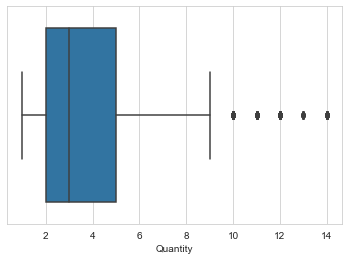

In [77]:
#Analysing the quantity sold for outliers
sns.boxplot('Quantity', data=df)
#We cannot remove outliers in quantity simply, because depending on the discount given, there could be an increase in quantity sold

<AxesSubplot:xlabel='Discount'>

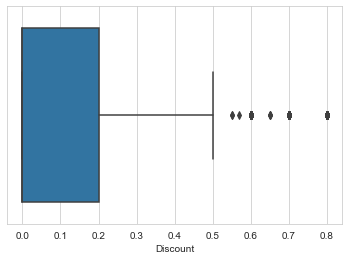

In [78]:
#Analysing the discount feature for outliers 
sns.boxplot('Discount', data=df)
#Here we can see some unusual discounts crossing 50%. But this could be discounts offered to clear out remaining stock too

In [79]:
df.Discount.describe()

count    10000.000000
mean         0.142517
std          0.212472
min          0.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          0.800000
Name: Discount, dtype: float64

(array([5778.,  889., 1165.,  184.,   37.,  823.,  293.,  399.,  369.,
          63.]),
 array([0.  , 0.08, 0.16, 0.24, 0.32, 0.4 , 0.48, 0.56, 0.64, 0.72, 0.8 ]),
 <BarContainer object of 10 artists>)

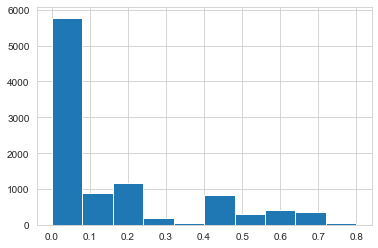

In [80]:
plt.hist(x='Discount', data=df)

(-2000.0, 10000.0)

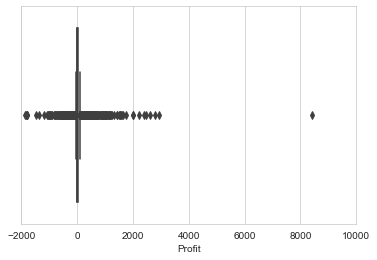

In [81]:
#Analysing the profits for outliers
sns.boxplot('Profit', data=df)
plt.xlim(-2000,10000)

(array([2.00e+01, 9.35e+03, 6.10e+02, 1.40e+01, 5.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([-1869.876 ,  -842.8908,   184.0944,  1211.0796,  2238.0648,
         3265.05  ,  4292.0352,  5319.0204,  6346.0056,  7372.9908,
         8399.976 ]),
 <BarContainer object of 10 artists>)

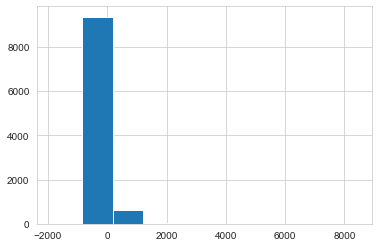

In [82]:
plt.hist('Profit', data=df)

In [83]:
df[df.Profit>=3000]

,Segment,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
8898,Corporate,Technology,Copiers,17499.95,5,0.0,8399.976,349.07,Medium


In [84]:
df.drop(8898, inplace=True)

In [85]:
#Removing the negative outliers in the profit too 
Q1=df['Profit'].quantile(q=0.25)
Q3=df['Profit'].quantile(q=0.75)
IQR=Q3-Q1
#IQR=Inter Quantile Range
upper_limit=Q3+(1.5*IQR)
lower_limit=Q1-(1.5*IQR)
print(upper_limit, lower_limit)

91.53 -54.918000000000006


In [86]:
df['Profit']=np.where(df['Profit']<-1200, -54.918000000000006, df['Profit'])

In [87]:
df.head(2)

,Segment,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Consumer,Office Supplies,Storage,408.300,2,0.0,106.140,35.46,Medium
1,Consumer,Office Supplies,Supplies,120.366,3,0.1,36.036,9.72,Medium


<AxesSubplot:xlabel='Profit', ylabel='Sales'>

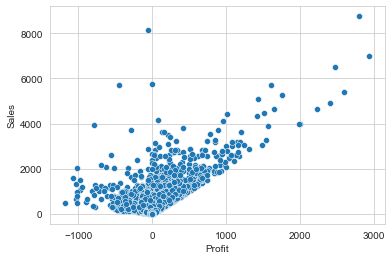

In [88]:
sns.scatterplot('Profit', 'Sales', data=df)

<AxesSubplot:xlabel='Shipping Cost'>

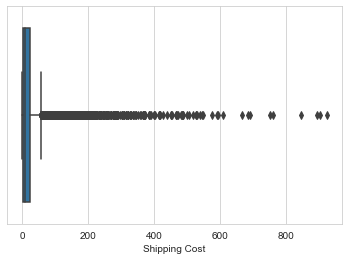

In [89]:
#Shipping Cost Feature
sns.boxplot('Shipping Cost', data=df)

(array([9.36e+03, 4.15e+02, 1.25e+02, 5.00e+01, 1.80e+01, 1.80e+01,
        4.00e+00, 3.00e+00, 2.00e+00, 4.00e+00]),
 array([1.00000e-02, 9.23720e+01, 1.84734e+02, 2.77096e+02, 3.69458e+02,
        4.61820e+02, 5.54182e+02, 6.46544e+02, 7.38906e+02, 8.31268e+02,
        9.23630e+02]),
 <BarContainer object of 10 artists>)

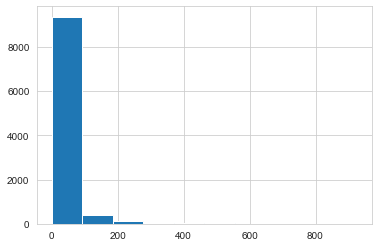

In [90]:
plt.hist(x='Shipping Cost', data=df )

<AxesSubplot:xlabel='Shipping Cost', ylabel='Sales'>

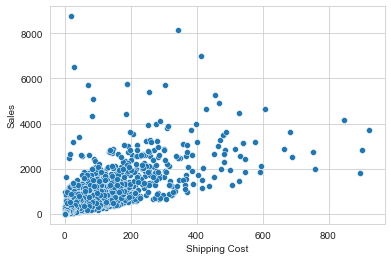

In [91]:
sns.scatterplot('Shipping Cost', 'Sales', data=df)

In [92]:
df[df['Shipping Cost']>300].head(5)
#It can be observed that shipping cost is more for the corporate segment, which are essential, so no changes are made here 

,Segment,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
305,Consumer,Furniture,Chairs,2807.84,8,0.0,673.8816,487.15,High
415,Corporate,Furniture,Chairs,2754.00,6,0.0,358.0200,752.47,Critical
700,Corporate,Technology,Machines,1619.10,10,0.0,258.9000,301.73,High
775,Consumer,Furniture,Tables,855.15,1,0.0,384.8100,325.04,Critical
912,Corporate,Office Supplies,Appliances,2526.93,5,0.1,561.4800,689.80,Critical


<AxesSubplot:xlabel='Sales'>

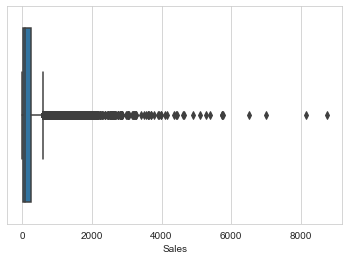

In [93]:
sns.boxplot('Sales', data=df)

In [94]:
df[df.Sales>8000]
#The sales of above 8000 are for machines, so they cannot be considered as outliers

,Segment,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
2255,Consumer,Technology,Machines,8159.952,8,0.4,-54.918,342.11,Medium
8209,Consumer,Technology,Machines,8749.950,5,0.0,2799.984,17.83,Critical


In [95]:
#Creating another dataset with threshold standard deviation kept at less than 3
exep=df.copy()
exep.head()

,Segment,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Consumer,Office Supplies,Storage,408.300,2,0.0,106.140,35.46,Medium
1,Consumer,Office Supplies,Supplies,120.366,3,0.1,36.036,9.72,Medium
2,Consumer,Office Supplies,Storage,66.120,4,0.0,29.640,8.17,High
3,Home Office,Office Supplies,Paper,44.865,3,0.5,-26.055,4.82,High
4,Consumer,Furniture,Furnishings,113.670,5,0.1,37.770,4.70,Medium


In [96]:
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(exep[['Discount', 'Sales', 'Shipping Cost', 'Profit', 'Quantity']]))
print(z)

      Discount     Sales  Shipping Cost    Profit  Quantity
0     0.670838  0.340374       0.163832  0.474195  0.656384
1     0.200178  0.270115       0.292761  0.025511  0.211694
2     0.670838  0.385130       0.320256  0.015425  0.232996
3     1.682462  0.430195       0.379680  0.371887  0.211694
4     0.200178  0.284312       0.381809  0.036609  0.677687
...        ...       ...            ...       ...       ...
9995  0.670838  0.486647       0.442120  0.194632  0.656384
9996  0.670838  0.483212       0.446910  0.188616  1.101074
9997  0.670838  0.502421       0.452054  0.187272  1.101074
9998  0.670838  0.501149       0.460214  0.203784  1.101074
9999  0.200178  3.665466       2.650079  3.589021  2.456447

[9999 rows x 5 columns]


In [97]:
threshold=3
exep_1=exep[(z<3).all(axis=1)]
exep_1.shape

(9483, 9)

In [98]:
#We have created two dataframes 
#One is to know the impact of more sold products with higher discounts and higher sales [df]
#Second is optimized taking threshold standard deviation as 3 
#Check the data for formatting issues and clean the data where needed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Segment         9999 non-null   object 
 1   Category        9999 non-null   object 
 2   Sub-Category    9999 non-null   object 
 3   Sales           9999 non-null   float64
 4   Quantity        9999 non-null   int64  
 5   Discount        9999 non-null   float64
 6   Profit          9999 non-null   float64
 7   Shipping Cost   9999 non-null   float64
 8   Order Priority  9999 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 781.2+ KB


Text(0.5, 1.0, 'Segment wise number of sales')

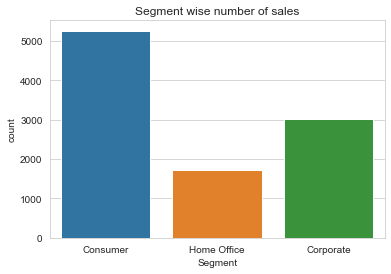

In [99]:
sns.countplot('Segment', data=df)
plt.title('Segment wise number of sales')

Text(0.5, 1.0, 'Category wise number of sales')

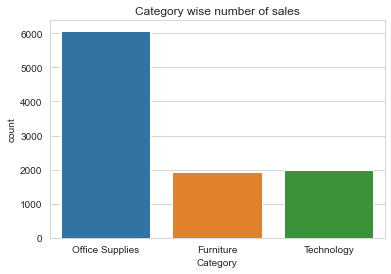

In [100]:
sns.countplot('Category', data=df)
plt.title('Category wise number of sales')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Storage'),
  Text(1, 0, 'Supplies'),
  Text(2, 0, 'Paper'),
  Text(3, 0, 'Furnishings'),
  Text(4, 0, 'Copiers'),
  Text(5, 0, 'Bookcases'),
  Text(6, 0, 'Appliances'),
  Text(7, 0, 'Art'),
  Text(8, 0, 'Accessories'),
  Text(9, 0, 'Binders'),
  Text(10, 0, 'Labels'),
  Text(11, 0, 'Envelopes'),
  Text(12, 0, 'Chairs'),
  Text(13, 0, 'Machines'),
  Text(14, 0, 'Tables'),
  Text(15, 0, 'Phones'),
  Text(16, 0, 'Fasteners')])

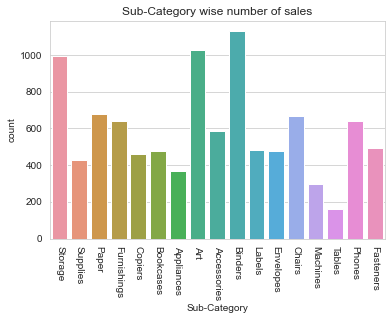

In [101]:
sns.countplot('Sub-Category', data=df)
plt.title('Sub-Category wise number of sales')
plt.xticks(rotation=-90)

Text(0.5, 1.0, 'Order Priority wise number of sales')

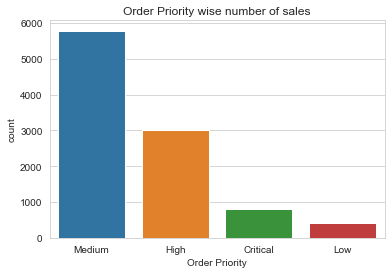

In [102]:
sns.countplot('Order Priority', data=df)
plt.title('Order Priority wise number of sales')

Text(0.5, 1.0, 'Segment wise profits')

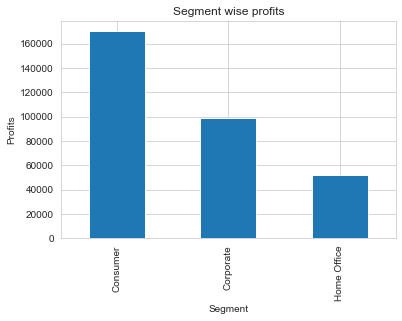

In [103]:
segment_wise_profits=df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
segment_wise_profits.plot(kind='bar')
plt.ylabel('Profits')
plt.title('Segment wise profits')
#Consumer segment made the maximum profit

Text(0.5, 1.0, 'Category wise profits')

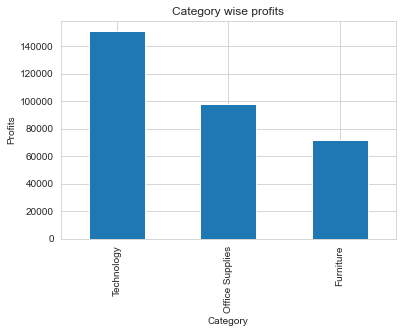

In [104]:
Category_wise_profits=df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
Category_wise_profits.plot(kind='bar')
plt.ylabel('Profits')
plt.title('Category wise profits')

Text(0.5, 1.0, 'Sub-Category wise profits')

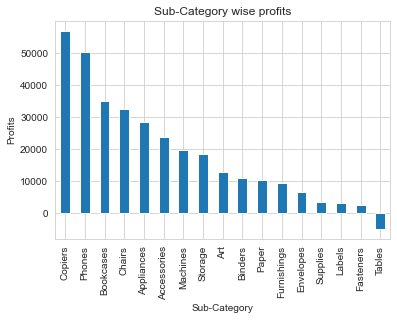

In [105]:
Sub_Category_wise_profits=df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
Sub_Category_wise_profits.plot(kind='bar')
plt.ylabel('Profits')
plt.title('Sub-Category wise profits')

<BarContainer object of 9999 artists>

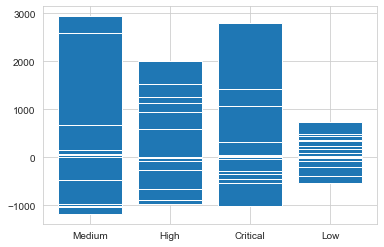

In [106]:
plt.bar('Order Priority', 'Profit', data=df)

<AxesSubplot:xlabel='Order Priority', ylabel='Profit'>

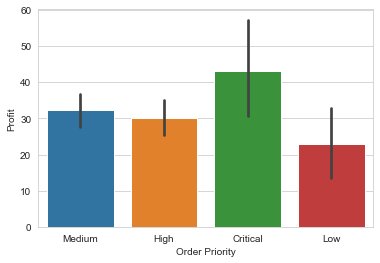

In [107]:
sns.barplot('Order Priority', 'Profit', data=df)
#gives a mean profit of each priority 
#Shows profit generated per sales is highest for critical order priority

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Storage'),
  Text(1, 0, 'Supplies'),
  Text(2, 0, 'Paper'),
  Text(3, 0, 'Furnishings'),
  Text(4, 0, 'Copiers'),
  Text(5, 0, 'Bookcases'),
  Text(6, 0, 'Appliances'),
  Text(7, 0, 'Art'),
  Text(8, 0, 'Accessories'),
  Text(9, 0, 'Binders'),
  Text(10, 0, 'Labels'),
  Text(11, 0, 'Envelopes'),
  Text(12, 0, 'Chairs'),
  Text(13, 0, 'Machines'),
  Text(14, 0, 'Tables'),
  Text(15, 0, 'Phones'),
  Text(16, 0, 'Fasteners')])

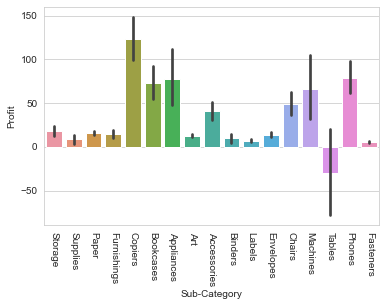

In [110]:
sns.barplot('Sub-Category', 'Profit', data=df)
plt.xticks(rotation=-90)
#Highest mean profits are generated for the copier sub-category 

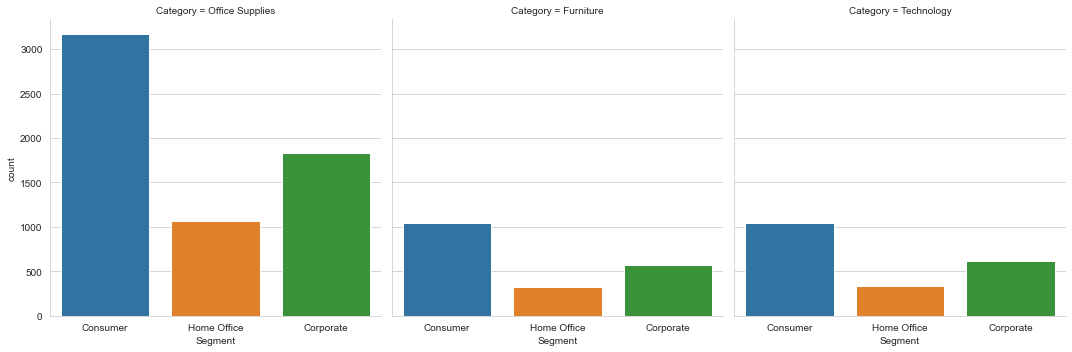

In [111]:
sns.catplot(x="Segment", col="Category", data=df, kind="count")
#Office supplies are more sold in comparison to other category

In [112]:
#Building a Regression model
df=pd.get_dummies(df,drop_first=True)
df.head(2)

,Sales,Quantity,Discount,Profit,Shipping Cost,Segment_Corporate,Segment_Home Office,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,408.300,2,0.0,106.140,35.46,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,120.366,3,0.1,36.036,9.72,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [113]:
X=df.drop('Sales', axis=1)
#it is the independent variable so we drop sales from that 

In [114]:
Y=df['Sales']
#We put sales in the dependent variable, and all the other parameters that influence the sales in the independent variable 

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [116]:
#Training the linear regression model on the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [117]:
#Predicting the values
Y_pred=regressor.predict(X_test)
np.set_printoptions(precision=2)
#The precision factor will round it off to that values, essentialy decides the number of decimal places in a floating point variable
Y_pred

array([147.46,  70.76, 310.6 , ...,  60.15, 367.86,  52.42])

In [118]:
import sklearn.metrics

In [119]:
mse=sklearn.metrics.mean_squared_error(Y_test,Y_pred)
mse

49901.20499313603

In [120]:
mae=sklearn.metrics.mean_absolute_error(Y_test,Y_pred)
mae

114.80873336282357

In [121]:
#Find the root mean squared error
import math
rmse=math.sqrt(mse)
rmse

223.38577616566377

In [122]:
evaluate=pd.DataFrame({'Actual':Y_test.values.flatten(), 'Predicted':Y_pred.flatten()})
evaluate.head(5)

,Actual,Predicted
0,152.442,147.457961
1,54.360,70.757391
2,74.624,310.602062
3,225.612,429.303565
4,84.180,26.537056


<AxesSubplot:>

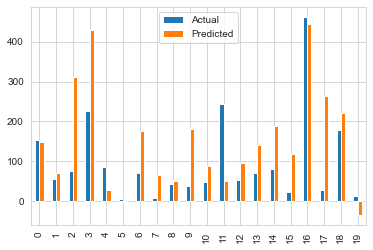

In [123]:
#plotting it on a bar plot
evaluate.head(20).plot(kind='bar')

In [124]:
#Calculating the r2 score 
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test, Y_pred)
r2_score

0.7528501912746199

In [125]:
def mean_absolute_percentage_error(y_true, y_predict):
    y_true, y_predict= np.array(y_true), np.array(y_predict)
    return np.mean(np.abs((y_true - y_predict) / y_true)) * 100

In [126]:
mean_absolute_percentage_error(Y_test, Y_pred)

186.8684731192842

In [127]:
#K-fold cross validation method for defining accuracy of the model 
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
np.mean(cross_val_score(lr, X, Y, cv=10))

0.7461279889996815

In [128]:
#Now using exep dataframe with threshold standard deviation value of 3, checking the accuracy of the linear regression model with this dataframe
exep_1=pd.get_dummies(exep_1, drop_first=True)
X=exep_1.drop('Sales', axis=1)
X.head(2)

,Quantity,Discount,Profit,Shipping Cost,Segment_Corporate,Segment_Home Office,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,Sub-Category_Art,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,2,0.0,106.140,35.46,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,3,0.1,36.036,9.72,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [129]:
Y=exep_1['Sales']
Y.head(2)

0    408.300
1    120.366
Name: Sales, dtype: float64

In [130]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=0)

In [131]:
regressor=LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [132]:
Y_pred=regressor.predict(X_test)
#Comparing test and predicted values
evaluate=pd.DataFrame({'Actual':Y_test.values.flatten(), 'Predicted':Y_pred.flatten()})
evaluate.head(5)

,Actual,Predicted
0,510.12,471.879327
1,486.12,485.414556
2,1084.68,1007.005009
3,53.55,-22.902200
4,33.12,97.514200


In [133]:
#r2 score
from sklearn.metrics import r2_score
score=r2_score(Y_test, Y_pred)
score

0.7759428858745696

In [134]:
mse=sklearn.metrics.mean_squared_error(Y_test, Y_pred)
mse

14994.26778211687

In [135]:
mae=sklearn.metrics.mean_absolute_error(Y_test, Y_pred)
mae

72.51194735487363

In [136]:
def mean_absolute_percentage_error(y_true, y_predicted):
    y_true, y_predicted=np.array(y_true), np.array(y_predicted)
    return np.mean(np.abs((y_true-y_predicted)/y_true))*100

In [137]:
mean_absolute_percentage_error(Y_test, Y_pred)

123.43020265541007

In [140]:
from sklearn.model_selection import cross_val_score 
np.mean(cross_val_score(lr, X_train, Y_train, cv=10))

0.7624728242846743

In [ ]:
#Checking the errors in both datasets of df and exep_1, it has been observed that exep_1 has less erros in comparison to df, so for further models we will use exep_1

In [141]:
#Running hyper parameter tuning
from sklearn.model_selection import GridSearchCV
parameters={'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
exep_1_grid=GridSearchCV(regressor, parameters, cv=10)
exep_1_grid.fit(X_train, Y_train)
print('r2 score is:', exep_1_grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((exep_1_grid.predict(X_test) - Y_test) ** 2))

r2 score is: 0.7625777265293003
Residual sum of squares: 14995.49


In [142]:
#Building Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor

In [147]:
rfr=RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [145]:
#Cross Validation Score
from sklearn.model_selection import cross_val_score
rfr=RandomForestRegressor()
np.mean(cross_val_score(rfr, X_train, Y_train, cv=10))

0.8349836860645115

In [148]:
rfr_y_pred=rfr.predict(X_test)

In [149]:
from sklearn.metrics import mean_squared_error
rfr_mse=mean_squared_error(Y_test, rfr_y_pred)
rfr_mse

10045.123043942012

In [150]:
#Finding mean absolute error
from sklearn.metrics import mean_absolute_error
rfr_mae=mean_absolute_error(rfr_y_pred, Y_test)
rfr_mae

50.28646321785589

In [151]:
rfr_mape=mean_absolute_percentage_error(rfr_y_pred, Y_test)
rfr_mape

28.892520219015417

In [152]:
from sklearn.metrics import r2_score
rfr_r2_score=r2_score(rfr_y_pred, Y_test)
rfr_r2_score

0.8288436564246021

In [153]:
#Hyperparameter tuning of the model using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
parameters={'n_estimators':[150, 200, 250, 270, 280, 300], 'max_depth':[4.8, 4.9, 5, 5.1, 5.2]}
rfr_grid_search=RandomizedSearchCV(estimator=rfr, cv=10, n_jobs=-1, n_iter=10, param_distributions=parameters)
rfr_grid_search=rfr_grid_search.fit(X_train, Y_train)
rfr_best_score=rfr_grid_search.best_score_
rfr_best_parameter=rfr_grid_search.best_params_
print(rfr_best_score, rfr_best_parameter)
#Here the rfr_best_score and rfr_best_parameter will reflect the best score that was obtained and the parameters against which that score was obtained.

0.8178720904427615 {'n_estimators': 300, 'max_depth': 5}


In [154]:
from sklearn.model_selection import RandomizedSearchCV
parameters={'n_estimators':[300, 350], 'max_depth':[5, 5.01, 5.02, 5.03]}
rfr_grid_search=RandomizedSearchCV(estimator=rfr, cv=10, n_jobs=-1, n_iter=10, param_distributions=parameters)
rfr_grid_search=rfr_grid_search.fit(X_train, Y_train)
rfr_best_score=rfr_grid_search.best_score_
rfr_best_parameter=rfr_grid_search.best_params_
print(rfr_best_score, rfr_best_parameter)

0.8178720904427615 {'n_estimators': 300, 'max_depth': 5}


In [155]:
from sklearn.model_selection import RandomizedSearchCV
parameters={'n_estimators':[280, 290, 300, 310, 320, 330], 'max_depth':[5, 5.1, 5.2, 5.3]}
rfr_grid_search=RandomizedSearchCV(estimator=rfr, cv=10, n_jobs=-1, n_iter=10, param_distributions=parameters)
rfr_grid_search=rfr_grid_search.fit(X_train, Y_train)
rfr_best_score=rfr_grid_search.best_score_
rfr_best_parameter=rfr_grid_search.best_params_
print(rfr_best_score, rfr_best_parameter)

0.8178720904427615 {'n_estimators': 300, 'max_depth': 5.2}


In [156]:
rfr_predict_values=rfr_grid_search.predict(X_test)
print(len(rfr_predict_values))

2845


In [157]:
evaluate_rfr=pd.DataFrame({'Actual':Y_test.values.flatten(), 'Predicted':rfr_predict_values.flatten()})
evaluate_rfr.head(5)

,Actual,Predicted
0,510.12,500.162982
1,486.12,511.130894
2,1084.68,1206.877998
3,53.55,67.278217
4,33.12,30.471085


In [158]:
rfr_r2_score=r2_score(Y_test, rfr_predict_values)
print(rfr_r2_score)

0.8332455043242434


In [159]:
#Building a decision tree model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=0)
dtr=dtr.fit(X_train, Y_train)

In [161]:
from sklearn.model_selection import cross_val_score
Accuracy=cross_val_score(dtr, X_train, Y_train, cv=10)

In [162]:
print("Accuracy(MEAN): {:.2f} %".format(Accuracy.mean()*100))
print("Accuracy(STD): {:.2f} %".format(Accuracy.std()*100))

Accuracy(MEAN): 69.55 %
Accuracy(STD): 3.13 %


In [163]:
dtr_y_pred=dtr.predict(X_test)
dtr_y_train_pred=dtr.predict(X_train)

In [164]:
evaluate=pd.DataFrame({'Actual':Y_test.values.flatten(), 'Predicted':dtr_y_pred.flatten()})
evaluate.head(5)

,Actual,Predicted
0,510.12,549.24
1,486.12,496.44
2,1084.68,1057.38
3,53.55,19.90
4,33.12,41.96


In [165]:
#Finding the mean squared error, root mean squared error and mean absolute error
from sklearn.metrics import mean_squared_error
mse_dtr=mean_squared_error(Y_test, dtr_y_pred)
print(mse)

14994.26778211687


In [166]:
from sklearn.metrics import mean_absolute_error
mae_dtr=mean_absolute_error(Y_test, dtr_y_pred)
print(mae)

72.51194735487363


In [167]:
#r2 score calculation
from sklearn.metrics import r2_score
dtr_score=r2_score(Y_test, dtr_y_pred)
print(dtr_score)

0.7268128957492892


In [168]:
import math 
rmse_dtr=math.sqrt(mse_dtr)
print(rmse_dtr)

135.21141560908268


In [169]:
path=dtr.cost_complexity_pruning_path(X_train, Y_train)
alphas=path['ccp_alphas']
alphas

array([0.00e+00, 1.07e-18, 1.07e-18, ..., 3.95e+03, 4.52e+03, 3.37e+04])

In [170]:
#Hyper Parameter tuning of Decision Tree Model 
parameters={'splitter':['best', 'random'], 'max_depth':[3,5], 'ccp_alpha':[0.1,0.2,0.3,0.4]}
dtr_grid_search=RandomizedSearchCV(param_distributions=parameters, cv=10, n_jobs=1, n_iter=10, estimator=dtr)
dtr_grid_search=dtr_grid_search.fit(X_train, Y_train)
dtr_best_parameter=dtr_grid_search.best_params_
dtr_best_score=dtr_grid_search.best_score_
print(dtr_best_score,dtr_best_parameter)

0.793362363091308 {'splitter': 'best', 'max_depth': 5, 'ccp_alpha': 0.1}


In [171]:
#r2 score of the model
parameters={'splitter':['best', 'random'], 'max_depth':[5.4, 5.45, 5.46, 5.49, 5.5], 'ccp_alpha':[0.222,0.223,0.224,0.225, 0.227,0.228]}
dtr_grid_search=RandomizedSearchCV(param_distributions=parameters, cv=10, n_jobs=1, n_iter=10, estimator=dtr)
dtr_grid_search=dtr_grid_search.fit(X_train, Y_train)
dtr_best_parameter=dtr_grid_search.best_params_
dtr_best_score=dtr_grid_search.best_score_
print(dtr_best_score,dtr_best_parameter)

0.793362363091308 {'splitter': 'best', 'max_depth': 5.46, 'ccp_alpha': 0.224}


In [172]:
dtr_y_pred=dtr_grid_search.predict(X_test)

In [173]:
evaluate=pd.DataFrame({'Actual':Y_test.values.flatten(),'Predicted':dtr_y_pred.flatten()})
evaluate.head()

,Actual,Predicted
0,510.12,495.469220
1,486.12,495.469220
2,1084.68,1239.080156
3,53.55,74.242277
4,33.12,34.743633


In [174]:
dtr_pred_r2score=r2_score(Y_test, dtr_y_pred)
print(dtr_pred_r2score)

0.7998349962829171


In [175]:
#Building a support vector regression model
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train, Y_train)

SVR()

In [176]:
#K-fold cross validation
Accuracy_svr=cross_val_score(svr, X_train, Y_train, cv=10)
print('Mean Accuracy Percentage is:',Accuracy_svr.mean()*100)

Mean Accuracy Percentage is: 53.21187996208834


In [177]:
svr_y_predict=svr.predict(X_test)

In [178]:
## Mean squared error and mean absolute error
mse=mean_squared_error(Y_test,svr_y_predict)
mse

30285.15002599193

In [179]:
mae=mean_absolute_error(Y_test,svr_y_predict)
mae

79.51223047424297

In [180]:
#Root mean square error
rmse_svr=math.sqrt(mse)
rmse_svr

174.02629119185391

In [181]:
r2_score_svr=r2_score(Y_test, svr_y_predict)
r2_score_svr

0.5474535059476261

In [209]:
#Hyperparameter tuning of SVR model
parameter=[{'C':[1,10,100,1000], 'kernel':['rbf'], 'gamma':[0.1,0.2,0.3,0.4]}]
svr_grid_search=RandomizedSearchCV(svr, param_distributions=parameter, n_iter=10, cv=10, n_jobs=-1)

In [210]:
svr_grid_search=svr_grid_search.fit(X_train, Y_train)

In [211]:
svr_best_score=svr_grid_search.best_score_
svr_best_parameter=svr_grid_search.best_params_
print(svr_best_score, svr_best_parameter)

0.5800626514187839 {'kernel': 'rbf', 'gamma': 0.1, 'C': 1000}


In [212]:
svr_y_predict_values=svr_grid_search.predict(X_test)

In [214]:
parameter=[{'C':[10,20,30,1000], 'kernel':['rbf'], 'gamma':[0.1,0.01, 0.001]}]
svr_grid_search=RandomizedSearchCV(svr, param_distributions=parameter, n_iter=10, cv=10, n_jobs=-1)

In [215]:
svr_grid_search=svr_grid_search.fit(X_train, Y_train)

In [216]:
svr_best_score=svr_grid_search.best_score_
svr_best_parameter=svr_grid_search.best_params_
print(svr_best_score, svr_best_parameter)

0.7051845518596642 {'kernel': 'rbf', 'gamma': 0.001, 'C': 20}


In [218]:
parameter=[{'C':[20,25, 27, 30, 35], 'kernel':['rbf'], 'gamma':[0.001, 0.0001, 0.00001]}]
svr_grid_search=RandomizedSearchCV(svr, param_distributions=parameter, n_iter=10, cv=10, n_jobs=-1)

In [219]:
svr_grid_search=svr_grid_search.fit(X_train, Y_train)

In [220]:
svr_best_score=svr_grid_search.best_score_
svr_best_parameter=svr_grid_search.best_params_
print(svr_best_score, svr_best_parameter)

0.7450816132736484 {'kernel': 'rbf', 'gamma': 0.0001, 'C': 27}


In [222]:
svr_y_predict=svr_grid_search.predict(X_test)

In [224]:
svr_r2score=r2_score(Y_test, svr_y_predict)
print(svr_r2score)

0.7600699623613233


In [225]:
#Based on the four models trained, the r2 scores for all 4 models are as seen here:
#Linear Regression: 0.7625
#Random Forest Regression: 0.8332
#Decision Tree Model: 0.7998
#Support Vector Regression model: 0.790069

#Based on the following, Random Forest Regression gives the best prediction of sales, and can be used for future predictions. 